In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
import warnings
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn import tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, median_absolute_error, roc_auc_score, r2_score, explained_variance_score

warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


df_immoweb = pd.read_csv('data.csv')
df_immoweb.head()

,ID,Type,SubType,Price,NetHabitableSurface(msq),BedroomCount,Province,Locality,Region,PostCode,Floor,RegionCode,BuildingCondition,ConstructionYear,FacadeCount,HasBalcony,HasGarden,KitchenType,Status
0,10128188,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520.0,2.0,FLANDERS,NaN,NaN,3.0,0.0,1.0,0.0,0.0
1,10128189,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520.0,2.0,FLANDERS,NaN,NaN,3.0,0.0,1.0,0.0,0.0
2,10128190,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520.0,2.0,FLANDERS,NaN,NaN,3.0,0.0,1.0,0.0,0.0
3,10128191,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520.0,2.0,FLANDERS,NaN,NaN,3.0,0.0,1.0,0.0,0.0
4,10128192,HOUSE,HOUSE,378242.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520.0,2.0,FLANDERS,NaN,NaN,4.0,0.0,1.0,0.0,0.0


In [3]:
len(df_immoweb)

12813

In [4]:
df_immoweb.describe()

,Price,NetHabitableSurface(msq),BedroomCount,PostCode,Floor,ConstructionYear,FacadeCount,HasBalcony,HasGarden,KitchenType,Status
count,12812.000000,12812.000000,12812.000000,12812.000000,12812.000000,7548.000000,12812.000000,12812.0,12812.000000,12812.000000,12812.000000
mean,327725.028957,135.337028,2.625429,5015.579067,2.245161,1984.416799,2.205589,0.0,0.331642,1.083281,0.210194
std,133980.362340,55.471716,0.979671,3141.430548,2.427674,99.562952,1.047482,0.0,0.470822,1.084666,0.407462
min,55000.000000,12.000000,1.000000,1000.000000,1.000000,1758.000000,1.000000,0.0,0.000000,0.000000,0.000000
25%,235000.000000,92.000000,2.000000,2180.000000,2.000000,1961.000000,1.000000,0.0,0.000000,0.000000,0.000000
50%,299051.500000,125.000000,3.000000,4020.000000,2.000000,1987.000000,2.000000,0.0,0.000000,1.000000,0.000000
75%,398000.000000,170.000000,3.000000,8500.000000,2.000000,2021.000000,3.000000,0.0,1.000000,2.000000,0.000000
max,755717.000000,301.000000,5.000000,9990.000000,202.000000,9999.000000,4.000000,0.0,1.000000,3.000000,1.000000


In [5]:
df_immoweb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12813 entries, 0 to 12812
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        12813 non-null  object 
 1   Type                      12812 non-null  object 
 2   SubType                   12812 non-null  object 
 3   Price                     12812 non-null  float64
 4   NetHabitableSurface(msq)  12812 non-null  float64
 5   BedroomCount              12812 non-null  float64
 6   Province                  12812 non-null  object 
 7   Locality                  12812 non-null  object 
 8   Region                    12812 non-null  object 
 9   PostCode                  12812 non-null  float64
 10  Floor                     12812 non-null  float64
 11  RegionCode                12812 non-null  object 
 12  BuildingCondition         8860 non-null   object 
 13  ConstructionYear          7548 non-null   float64
 14  Facade

## Step 1 : Data cleaning


In [7]:
def calc_age(birthdate):
    today = date.today()
    age = today.year - birthdate
    return age

df_immoweb["age"] = calc_age(df_immoweb["ConstructionYear"])

# Uncompleted buildings have a negative value for age. Set them to zero.
df_immoweb["age"] = df_immoweb["age"].apply(lambda x : x if x > 0 else 0) 

In [13]:
df_immoweb.sort_values('age')

In [11]:
# Size of datset
df_immoweb.shape

(12813, 20)

In [10]:
# Drop duplicates if it exists and check the size of the new dataframe
df_immoweb = df_immoweb.drop_duplicates()
df_immoweb.shape

(12813, 20)

In [12]:
# Check for NANs
(df_immoweb.isnull().sum(axis = 0)* 100 / len(df_immoweb)).sort_values(ascending=False)


ConstructionYear            41.091079
BuildingCondition           30.851479
Floor                        0.007805
Status                       0.007805
HasGarden                    0.007805
HasBalcony                   0.007805
FacadeCount                  0.007805
RegionCode                   0.007805
Type                         0.007805
PostCode                     0.007805
Region                       0.007805
Locality                     0.007805
Province                     0.007805
BedroomCount                 0.007805
NetHabitableSurface(msq)     0.007805
Price                        0.007805
SubType                      0.007805
KitchenType                  0.007805
ID                           0.000000
age                          0.000000
dtype: float64

In [13]:
# drop colummns where price is null
df_immoweb = df_immoweb[df_immoweb['Price'].notna()]


In [14]:
# Replace null values with 0
df_immoweb = df_immoweb.fillna(0)


In [15]:
# No NANs
(df_immoweb.isnull().sum(axis = 0)* 100 / len(df_immoweb)).sort_values(ascending=False)

ID                          0.0
Type                        0.0
Status                      0.0
KitchenType                 0.0
HasGarden                   0.0
HasBalcony                  0.0
FacadeCount                 0.0
ConstructionYear            0.0
BuildingCondition           0.0
RegionCode                  0.0
Floor                       0.0
PostCode                    0.0
Region                      0.0
Locality                    0.0
Province                    0.0
BedroomCount                0.0
NetHabitableSurface(msq)    0.0
Price                       0.0
SubType                     0.0
age                         0.0
dtype: float64

In [16]:
df_immoweb['Type'].unique()

array(['HOUSE', 'APARTMENT'], dtype=object)

In [17]:
df_immoweb['HasBalcony'].unique()

array([0.])

In [18]:
df_immoweb.dtypes


ID                           object
Type                         object
SubType                      object
Price                       float64
NetHabitableSurface(msq)    float64
BedroomCount                float64
Province                     object
Locality                     object
Region                       object
PostCode                    float64
Floor                       float64
RegionCode                   object
BuildingCondition            object
ConstructionYear            float64
FacadeCount                 float64
HasBalcony                  float64
HasGarden                   float64
KitchenType                 float64
Status                      float64
age                         float64
dtype: object

In [19]:
# Transform categorical data

columns = df_immoweb.columns

# for column in columns :

#     df_immoweb[column] =df_immoweb[column].replace(-1, np.nan)
    
map_type_of_property = {
                        "HOUSE" : 1,
                        "APARTMENT" : 2
                        }

map_state_of_the_building = {
                            "AS_NEW" : 2.0,
                            "JUST_RENOVATED" : 2.0,
                            "GOOD" : 2.0,
                            "TO_BE_DONE_UP" : 1.0,
                            "TO_RENOVATE" : 1.0,
                            "TO_RESTORE" : 1.0,
                            "NO_INFO" : 1.0
                            }

map_subtype_of_the_building = {
                         'HOUSE' : 1, 
                         'APARTMENT': 2, 
                         'PENTHOUSE': 3, 
                         'FLAT_STUDIO': 4,
                         'COUNTRY_COTTAGE': 5, 
                         'MIXED_USE_BUILDING': 6, 
                         'TOWN_HOUSE': 7, 
                         'VILLA': 8,
                         'MANSION': 9, 
                         'DUPLEX': 10, 
                         'GROUND_FLOOR': 11, 
                         'APARTMENT_BLOCK': 12, 
                         'CHALET': 13,
                         'EXCEPTIONAL_PROPERTY': 14,
                         'OTHER_PROPERTY': 15, 
                         'FARMHOUSE': 16, 
                         'TRIPLEX': 17,
                         'BUNGALOW': 18, 
                         'SERVICE_FLAT': 19, 
                         'KOT': 20, 
                         'MANOR_HOUSE': 21, 
                         'LOFT': 22
                            }



df_immoweb["Type"] = df_immoweb["Type"].map(map_type_of_property)

df_immoweb["BuildingConditions"] = df_immoweb["BuildingCondition"].map(map_state_of_the_building)
df_immoweb["SubType"] = df_immoweb["SubType"].map(map_subtype_of_the_building)

# Replace null values with 0
df_immoweb = df_immoweb.fillna(0)

In [20]:
df_immoweb.head()

,ID,Type,SubType,Price,NetHabitableSurface(msq),BedroomCount,Province,Locality,Region,PostCode,Floor,RegionCode,BuildingCondition,ConstructionYear,FacadeCount,HasBalcony,HasGarden,KitchenType,Status,age,BuildingConditions
0,10128188,1,1,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520.0,2.0,FLANDERS,0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10128189,1,1,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520.0,2.0,FLANDERS,0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
2,10128190,1,1,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520.0,2.0,FLANDERS,0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
3,10128191,1,1,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520.0,2.0,FLANDERS,0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
4,10128192,1,1,378242.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520.0,2.0,FLANDERS,0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
df_immoweb.columns

Index(['ID', 'Type', 'SubType', 'Price', 'NetHabitableSurface(msq)',
       'BedroomCount', 'Province', 'Locality', 'Region', 'PostCode', 'Floor',
       'RegionCode', 'BuildingCondition', 'ConstructionYear', 'FacadeCount',
       'HasBalcony', 'HasGarden', 'KitchenType', 'Status', 'age',
       'BuildingConditions'],
      dtype='object')

In [22]:
df_immoweb["localisation_score"] = np.nan

for index, row in df_immoweb.iterrows() :

    if df_immoweb[df_immoweb["PostCode"] == row["PostCode"]].shape[0] > 30 :

        df_immoweb.loc[index,["localisation_score"]] = df_immoweb[df_immoweb["PostCode"]== row["PostCode"]]["Price"].mean()

    elif df_immoweb[df_immoweb["Locality"] == row["Locality"]].shape[0] > 30 :

        df_immoweb.loc[index,["localisation_score"]] = df_immoweb[df_immoweb["Locality"]== row["Locality"]]["Price"].mean()

    else :

        df_immoweb.loc[index,["localisation_score"]] = df_immoweb[df_immoweb["Province"]== row["Province"]]["Price"].mean()

In [23]:
df_immoweb.head()

,ID,Type,SubType,Price,NetHabitableSurface(msq),BedroomCount,Province,Locality,Region,PostCode,Floor,RegionCode,BuildingCondition,ConstructionYear,FacadeCount,HasBalcony,HasGarden,KitchenType,Status,age,BuildingConditions,localisation_score
0,10128188,1,1,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520.0,2.0,FLANDERS,0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,324134.752475
1,10128189,1,1,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520.0,2.0,FLANDERS,0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,324134.752475
2,10128190,1,1,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520.0,2.0,FLANDERS,0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,324134.752475
3,10128191,1,1,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520.0,2.0,FLANDERS,0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,324134.752475
4,10128192,1,1,378242.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520.0,2.0,FLANDERS,0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,324134.752475


In [24]:
# NB: HasBalcony is dropped since all its values are zero

df_immoweb_clean = df_immoweb[['Type', 'SubType', 'NetHabitableSurface(msq)',
       'BedroomCount', 'Floor', 'FacadeCount',
       'HasGarden', 'KitchenType', 'Status', 'age',
       'BuildingConditions', 'localisation_score', 'Price']]

df_immoweb_clean.head()

,Type,SubType,NetHabitableSurface(msq),BedroomCount,Floor,FacadeCount,HasGarden,KitchenType,Status,age,BuildingConditions,localisation_score,Price
0,1,1,148.0,3.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,324134.752475,328330.0
1,1,1,148.0,3.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,324134.752475,328330.0
2,1,1,148.0,3.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,324134.752475,327829.0
3,1,1,148.0,3.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,324134.752475,327829.0
4,1,1,148.0,3.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,324134.752475,378242.0


## 2) Data Formatting

#### Standardisation of values


#### Now that the dataset is ready, you have to format it for machine learning:
#### Divide your dataset for training and testing. ( X_train , y_train , X_test , y_test )

<AxesSubplot: >

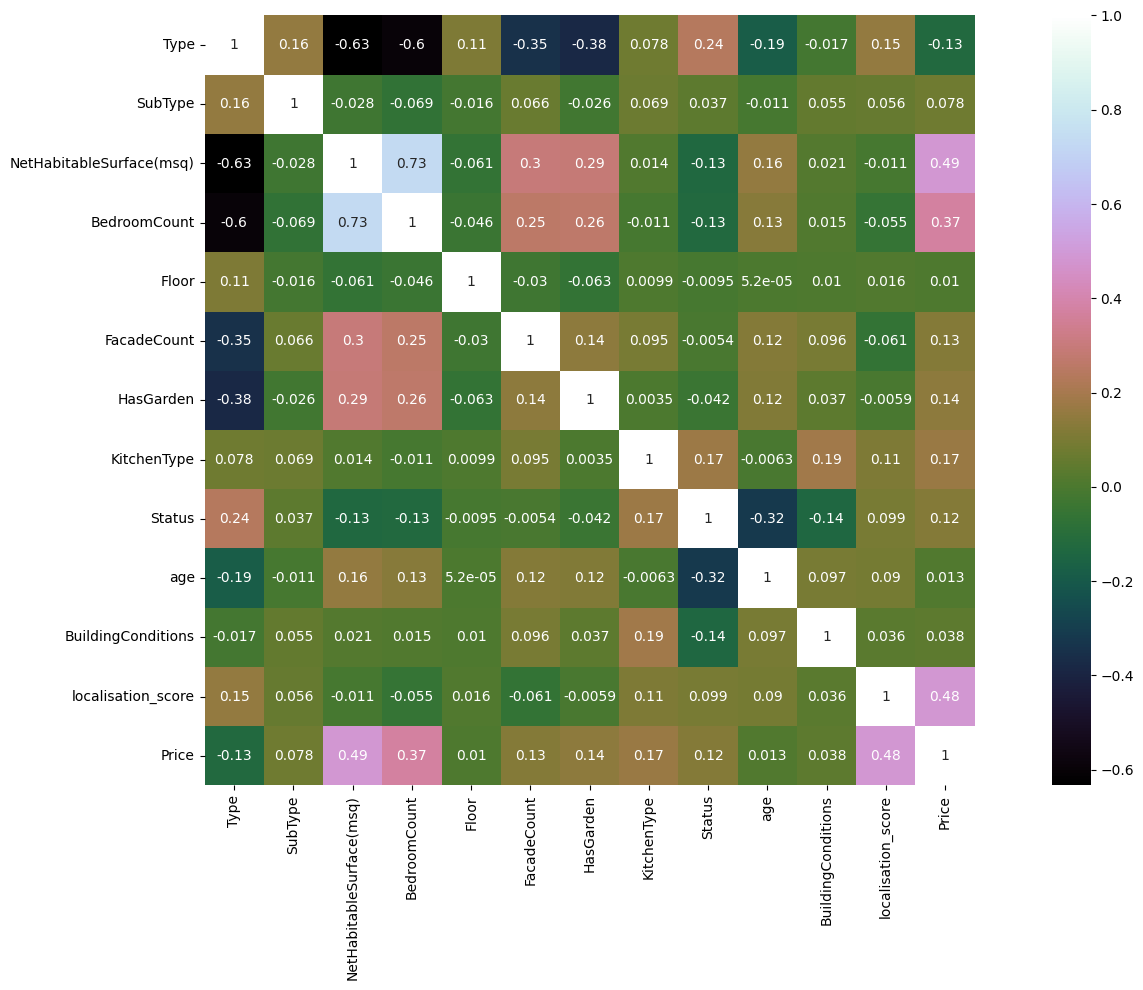

In [25]:
# GETTING Correllation matrix
corr_mat=df_immoweb_clean.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

From the correlation plot, we notice that there exist multicollinearity(correlation between explanatory variable) between "Type" and 'NetHabitableSurface(msq)','BedroomCount'. This not required by regression, thus we drop "Type".

In [26]:
df_immoweb_clean = df_immoweb_clean.drop(['Type'], axis=1)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn import tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



#To include all variables, we assign X and y
y = df_immoweb_clean.iloc[:,-1] # target: Last variable in dataset
X = df_immoweb_clean.iloc[:, :-1] # features: Every other vaiable except the last one
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3)

# NB: test_size=0.3 implies 30% of the data will be used to test the model while 70% of the data will be used to train the model.  


# For Simmple Linear Regression, we assign X_Simple and y_Simple
df_immoweb_simple = df_immoweb_clean[['age', 'Price']]
y_Simple = df_immoweb_simple.iloc[:,-1] #target variable
X_Simple = df_immoweb_simple.iloc[:, :-1] # Indepndent variable
X_Simple_train, X_Simple_test, y_Simple_train, y_Simple_test = train_test_split(X_Simple, y_Simple ,test_size=0.3)

## Step 3 : Model selection and Step 4: Model training
The dataset is ready. Now let's select a model.
Look at which models make the most sense according to your data.
Since the dependent variable is continuous, we consider some regression models


### Regression Modelling

#### Model 1 : SimpleLinear Regression 
Question: Does the age of a building( Whether House or Appartment) have an EFFECT on the price of a house or can age of a building ALONE be used to predict the price of a building?
Answer: To verify this question, we can do a simplelinear regression usiing Price and age(In this case we use X_Simple). 

In [28]:
from sklearn.linear_model import LinearRegression
Simple_Linear_Regession = LinearRegression()
SLR = Simple_Linear_Regession.fit(X_Simple_train,y_Simple_train) #actually produces the linear eqn for the data
y_simple_pred = SLR.predict(X_Simple_test)

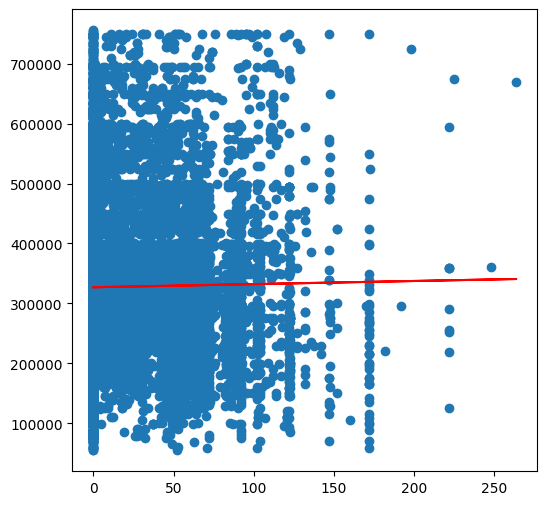

In [29]:
plt.figure(figsize=(6,6))
plt.scatter(X_Simple,y_Simple)
plt.plot(X_Simple_test, y_simple_pred, color="red")
plt.show()

In [30]:
R2_SLR= SLR.score(X_Simple, y_Simple)
print(R2_SLR)

0.00014411574088080137


In [31]:
rmse_SLR = mean_squared_error(y_Simple_test, y_simple_pred, squared = False)
rmse_SLR

133584.60384938962

#### R-Squared value: We expect this to be close to 1. The value is very low(0.00005) implying that(based on the data) we can not use the age of a house alone to predict the price of the house. We need to add more variables to the model.

#### Model 2 : Multiple Linear Regression: Add All regression variable


In [32]:
Multiple_Linear_Regession = LinearRegression()
MLR = Simple_Linear_Regession.fit(X_train,y_train) #actually produces the linear eqn for the data
pred_mlr = SLR.predict(X_test)

In [33]:
R2_MLR = MLR.score(X_train, y_train)
R2_MLR

0.52671073037679

In [34]:
rmse_MLR = mean_squared_error(y_test, pred_mlr, squared = False)
rmse_MLR

91407.2122709589

#### Model 3: Random Forest Regressor


In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
RFR = RandomForestRegressor(max_depth=15, random_state=2022)

RFR_reg = RFR.fit(X_train, y_train)

# Prediction
pred_RFR = RFR_reg.predict(X_test)

In [37]:
R2_RFR = RFR.score(X_train,y_train)
R2_RFR

0.9277375571183853

In [38]:
rmse_RFR = mean_squared_error(pred_RFR, y_test, squared = False)
rmse_RFR

74786.18457564797

## Model Evaluation
Let's evaluate your model by selecting the most appropriate metrics. Which
performance did you reach?

In [39]:
R_SQUARED =[R2_SLR, R2_MLR, R2_RFR]
RMSE=[rmse_SLR, rmse_MLR, rmse_RFR]

col={'R-Squared':R_SQUARED,'Root Mean Square Error':RMSE}
models=['Simple Linear Regression','Multiple Linear Regression','Random Forest Regressor']
df_models = pd.DataFrame(data=col,index=models)
df_models

,R-Squared,Root Mean Square Error
Simple Linear Regression,0.000144,133584.603849
Multiple Linear Regression,0.526711,91407.212271
Random Forest Regressor,0.927738,74786.184576


Note: Random Forest Regressor has the best performance given it has the lowest RMSE. RMSE  compares the difference between the actual price values in the test set and the predicted price values by our model.

#### How could you improve this result?
This results could be improved by adding more features(explanatory variables) and also adding more data for the model to train on. This could help explain more of the variability of housing price.

#### Which part of the process has the most impact on the results?

The training part has more impact on the results. This is because the model trains on historical and uses it to predict on new data. If there is not enough data and features, the more learns very little from the data hence a lower predictive power and vice versa.


#### How should you divide your time working on this kind of project?

To work on this kind of project, I will allocate more time to collecting data, cleaning and preparing data. This process take a lot more time than generating a model.